# Palmer penguins

<div align='center'>
    <img src="images/penguins.png" width="500"/>
</div>

*Artwork by <a href="https://allisonhorst.github.io/palmerpenguins/index.html">@allison_horst</a>*

The goal of this project is to develop a machine learning model able to classify Palmer penguins species using their body measurements.

Palmer Station is a United States research station in Antarctica located on Anvers Island, the only US station located north of the Antarctic Circle. Initial construction of the station finished in 1968. The station, like the other U.S. Antarctic stations, is operated by the United States Antarctic Program (USAP) of the National Science Foundation.

The three species subject of this project belong to the Pygoscelis genus. The genus Pygoscelis ("rump-legged") contains three living species of penguins collectively known as "brush-tailed penguins". A study has estimated that there are about 3.79 million pairs of Adélie, 387,000 pairs of gentoo, and 8 million pairs of chinstrap penguins in their particular areas, making up 90% of Antarctic avian biomass (Black, C. E. 2016)

Black, Caitlin E. (2016-03-01). <a href="https://link.springer.com/article/10.1007%2Fs00300-015-1807-8"> A comprehensive review of the phenology of Pygoscelis penguins.</a> Polar Biology. 39 (3): 405–432.

___

## About the data

These data were collected from 2007 - 2009 by Dr. Kristen Gorman with the <a href="https://pal.lternet.edu/">Palmer Station Long Term Ecological Research Program</a>, part of the <a href="https://lternet.edu/">US Long Term Ecological Research Network</a>. The data were imported directly from the <a href="https://environmentaldatainitiative.org/">Environmental Data Initiative (EDI) Data Portal</a>, and are available for use by CC0 license (“No Rights Reserved”) in accordance with the <a href="https://pal.lternet.edu/data/policies">Palmer Station Data Policy</a>.

<div align='center'>
    <img src="images/palmer_station.png" width="500"/>
</div>

**Data originally published in:**

Gorman KB, Williams TD, Fraser WR (2014). Ecological sexual dimorphism and environmental variability within a community of Antarctic penguins (genus Pygoscelis). PLoS ONE 9(3):e90081. https://doi.org/10.1371/journal.pone.0090081

**Individual datasets:**

Palmer Station Antarctica LTER and K. Gorman. 2020. Structural size measurements and isotopic signatures of foraging among adult male and female gentoo penguins (Pygoscelis papua) nesting along the Palmer Archipelago near Palmer Station, 2007-2009 ver 7. Environmental Data Initiative. https://doi.org/10.6073/pasta/9fc8f9b5a2fa28bdca96516649b6599b (Accessed 2022-01-11).

Palmer Station Antarctica LTER and K. Gorman. 2020. Structural size measurements and isotopic signatures of foraging among adult male and female Chinstrap penguins (Pygoscelis antarcticus) nesting along the Palmer Archipelago near Palmer Station, 2007-2009 ver 8. Environmental Data Initiative. https://doi.org/10.6073/pasta/ce9b4713bb8c065a8fcfd7f50bf30dde (Accessed 2022-01-11).

Palmer Station Antarctica LTER and K. Gorman. 2020. Structural size measurements and isotopic signatures of foraging among adult male and female Adélie penguins (Pygoscelis adeliae) nesting along the Palmer Archipelago near Palmer Station, 2007-2009 ver 5. Environmental Data Initiative. https://doi.org/10.6073/pasta/98b16d7d563f265cb52372c8ca99e60f (Accessed 2022-01-11).

___

## Data preparation

The idea of this project is to evaluate a supervised machine learning classifier algorithm to be able to classify the 3 species of Pygoscelis penguins using the body measurements. 

For that reason we will drop categorical features that don't seem to add value to the modeling process.

In [1]:
import pandas as pd

In [2]:
df1 = pd.read_csv('table_219.csv')
df2 = pd.read_csv('table_220.csv')
df3 = pd.read_csv('table_221.csv')

df = pd.concat([df1, df2, df3])
df.reset_index(drop=True,inplace=True)

In [3]:
df.shape

(344, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studyName            344 non-null    object 
 1   Sample Number        344 non-null    int64  
 2   Species              344 non-null    object 
 3   Region               344 non-null    object 
 4   Island               344 non-null    object 
 5   Stage                344 non-null    object 
 6   Individual ID        344 non-null    object 
 7   Clutch Completion    344 non-null    object 
 8   Date Egg             344 non-null    object 
 9   Culmen Length (mm)   342 non-null    float64
 10  Culmen Depth (mm)    342 non-null    float64
 11  Flipper Length (mm)  342 non-null    float64
 12  Body Mass (g)        342 non-null    float64
 13  Sex                  334 non-null    object 
 14  Delta 15 N (o/oo)    330 non-null    float64
 15  Delta 13 C (o/oo)    331 non-null    flo

In [6]:
df.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,2007-11-11,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,2007-11-11,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,2007-11-16,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,2007-11-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,2007-11-16,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


In [7]:
df['studyName'].value_counts() # just study names

PAL0910    120
PAL0809    114
PAL0708    110
Name: studyName, dtype: int64

In [8]:
df['Region'].value_counts() # a single geographical region

Anvers    344
Name: Region, dtype: int64

In [9]:
df['Stage'].value_counts() # a single egg stage

Adult, 1 Egg Stage    344
Name: Stage, dtype: int64

In [10]:
df['Individual ID'].value_counts() # individual ids

N61A2     3
N29A2     3
N22A1     3
N22A2     3
N23A1     3
         ..
N84A2     1
N84A1     1
N83A2     1
N83A1     1
N100A2    1
Name: Individual ID, Length: 190, dtype: int64

In [11]:
df['Clutch Completion'].value_counts() # has to do with female eggs

Yes    308
No      36
Name: Clutch Completion, dtype: int64

'Delta 15 N (o/oo)' -> this is stable isotops of Nitrogen. It can be used as a tracker of fertilizer
'Delta 13 C (o/oo)' -> the ratio of stable isotopes 13C : 12C. It can be used to reconstruct past diets. 

In [13]:
df.columns

Index(['studyName', 'Sample Number', 'Species', 'Region', 'Island', 'Stage',
       'Individual ID', 'Clutch Completion', 'Date Egg', 'Culmen Length (mm)',
       'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Sex',
       'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)', 'Comments'],
      dtype='object')

In [14]:
df = df.drop(['studyName', 'Sample Number', 'Region', 'Stage','Individual ID', 
               'Clutch Completion', 'Date Egg','Delta 15 N (o/oo)', 'Delta 13 C (o/oo)',
               'Comments'],axis=1)

In [15]:
df.head()

,Species,Island,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
0,Adelie Penguin (Pygoscelis adeliae),Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie Penguin (Pygoscelis adeliae),Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie Penguin (Pygoscelis adeliae),Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie Penguin (Pygoscelis adeliae),Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie Penguin (Pygoscelis adeliae),Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [16]:
df['Species'] = df['Species'].str.split(' ').str[0]

In [17]:
df.head()

,Species,Island,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


### Bill dimensions

The culmen is the upper ridge of a bird’s bill. In the simplified penguins data, culmen length and depth are renamed as variables bill_length_mm and bill_depth_mm to be more intuitive.

For this penguin data, the culmen (bill) length and depth are measured as shown below 

<div align='center'>
    <img src="images/culmen_depth.png" width="500"/>
</div>

*Artwork by <a href="https://allisonhorst.github.io/palmerpenguins/index.html">@allison_horst</a>*

In [18]:
df.columns = ['species', 'island', 'bill_length_mm', 'bill_depth_mm','flipper_length_mm', 'body_mass_g', 'sex']

In [19]:
df['sex'] = df['sex'].str.lower()

In [20]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [22]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


### Missing data

In [23]:
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [24]:
df['sex'].value_counts()

male      168
female    165
.           1
Name: sex, dtype: int64

In [25]:
df[df.isnull().any(axis=1)]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
178,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
218,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
256,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
271,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


It seems there are 10 rows with missing values. They represent 2.9% of the data therefore they will be dropped from the analysis.  

In [26]:
df.dropna(inplace=True)

### Feature Engineering

In [27]:
df[df['sex']=='.']

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
268,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


In [28]:
df[df['species']=='Gentoo'].groupby('sex').describe().transpose()

sex                           .       female         male
bill_length_mm    count     1.0    58.000000    61.000000
                  mean     44.5    45.563793    49.473770
                  std       NaN     2.051247     2.720594
                  min      44.5    40.900000    44.400000
                  25%      44.5    43.850000    48.100000
                  50%      44.5    45.500000    49.500000
                  75%      44.5    46.875000    50.500000
                  max      44.5    50.500000    59.600000
bill_depth_mm     count     1.0    58.000000    61.000000
                  mean     15.7    14.237931    15.718033
                  std       NaN     0.540249     0.741060
                  min      15.7    13.100000    14.100000
                  25%      15.7    13.800000    15.200000
                  50%      15.7    14.250000    15.700000
                  75%      15.7    14.600000    16.100000
                  max      15.7    15.500000    17.300000
flipper_length_mm count     1.0    58.000000    61.000000
                  mean    217.0   212.706897   221.540984
                  std       NaN     3.897856     5.673252
                  min     217.0   203.000000   208.000000
                  25%     217.0   210.000000   218.000000
                  50%     217.0   212.000000   221.000000
                  75%     217.0   215.000000   225.000000
                  max     217.0   222.000000   231.000000
body_mass_g       count     1.0    58.000000    61.000000
                  mean   4875.0  4679.741379  5484.836066
                  std       NaN   281.578294   313.158596
                  min    4875.0  3950.000000  4750.000000
                  25%    4875.0  4462.500000  5300.000000
                  50%    4875.0  4700.000000  5500.000000
                  75%    4875.0  4875.000000  5700.000000
                  max    4875.0  5200.000000  6300.000000

The sex of the individual on index 268 was not properly recorded. When comparing its body measurements with females and males of the same species (Gentoo) we can make an educated guess and classify it as a female. Its average bill length and body mass are similar to female dimensions while bill depth is closer to what is observed on males. Flipper lenght falls in the middle and could belong to both genres.

In [47]:
df.at[268,'sex'] = 'female'

___

## Exploratory Data Analysis

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

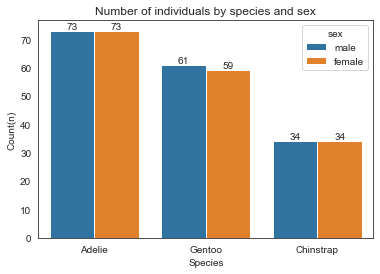

In [217]:
ax = sns.countplot(x='species', hue='sex', data=df)
plt.title('Number of individuals by species and sex')
plt.xlabel('Species')
plt.ylabel('Count(n)')
for container in ax.containers:
    ax.bar_label(container)

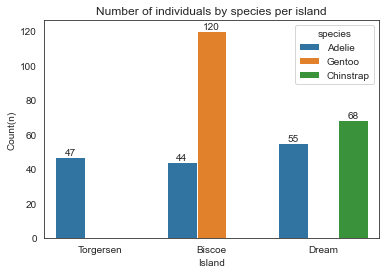

In [216]:
ax = sns.countplot(x='island', hue='species', data=df)
plt.title('Number of individuals by species per island')
plt.xlabel('Island')
plt.ylabel('Count(n)')
for container in ax.containers:
    ax.bar_label(container)

### Features vs Target

We will start investigating the distribution of the features against the target label, the 3 different species.

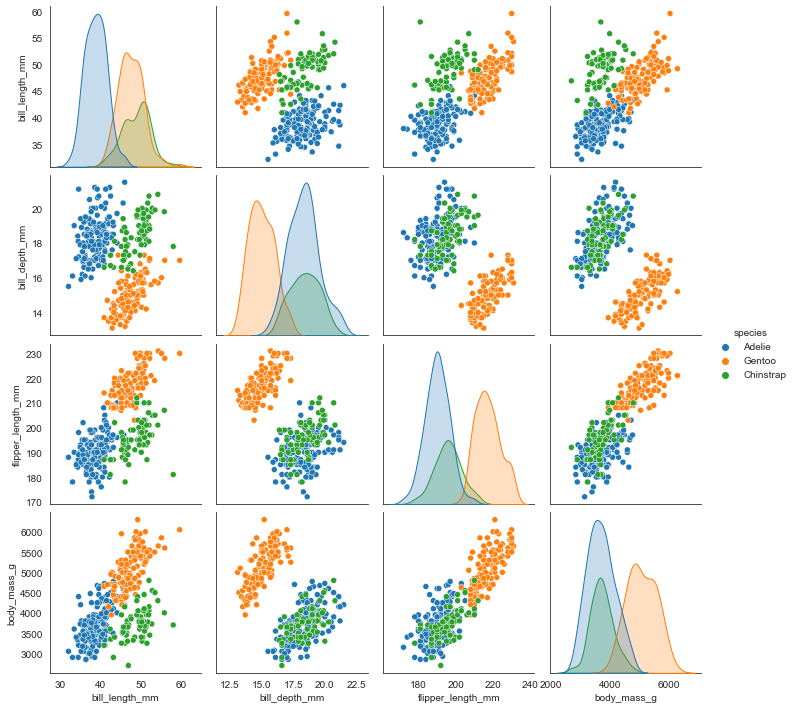

In [82]:
sns.pairplot(df,hue='species');

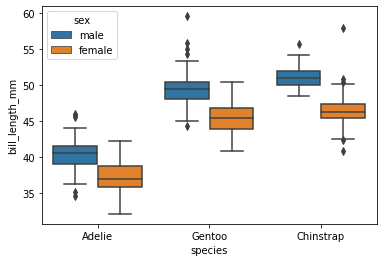

In [73]:
sns.boxplot(data=df,x='species',y='bill_length_mm',hue='sex');

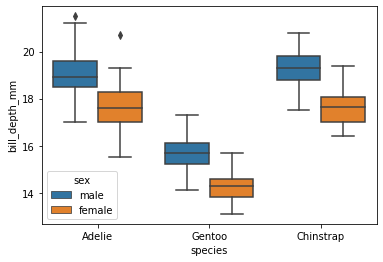

In [78]:
sns.boxplot(data=df,x='species',y='bill_depth_mm',hue='sex');

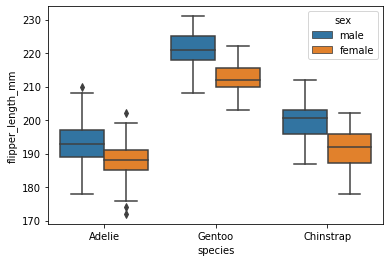

In [79]:
sns.boxplot(data=df,x='species',y='flipper_length_mm',hue='sex');

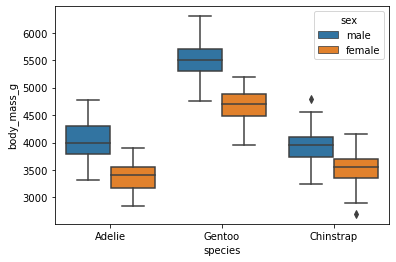

In [80]:
sns.boxplot(data=df,x='species',y='body_mass_g',hue='sex');

-> Males have bigger dimensions than females regardless of the specie. They are heavier, with longer flippers, longer and deeper bills.

-> The Gentoo penguins seem to be the ones that differ the most from the other 2 species while Chinstraps and Adelie have similar body dimensions.

-> It seems that the relationship of bill length and depth can be used as a reference to identify the 3 species. Let's have a look at that.

### Bill dimension

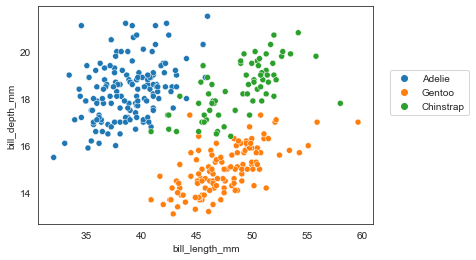

In [125]:
sns.scatterplot(data=df, x='bill_length_mm',y='bill_depth_mm', hue='species')
plt.legend(loc=(1.05,0.5));

As we can see from the graph above, Adelie penguins shorter but deeper bills, Gentoos have longer but thiner bills while Chinstraps bills are mid way between the two.

### Islands and size?

The Adelie penguin can be found on the 3 island while Gentoos were only measured on Biscoe Point while Chinstraps were only measured on Dream Island. We are going to look at the body measurements of the Adelie penguins to check if they look different  amongst the islands. 

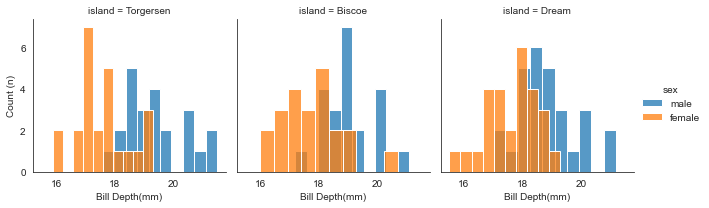

In [119]:
g = sns.FacetGrid(df[df['species']=='Adelie'],col='island',hue='sex')

g.map(sns.histplot, "bill_depth_mm",bins=10)
g.set_axis_labels('Bill Depth (mm)','Count (n)')
#g.set_titles(col_template='{col_name}',row_template='{row_name}')
g.add_legend();

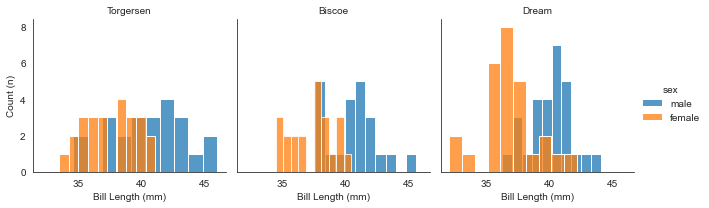

In [218]:
g = sns.FacetGrid(df[df['species']=='Adelie'],col='island',hue='sex')

g.map(sns.histplot, "bill_length_mm",bins=10)
g.set_axis_labels('Bill Length (mm)','Count (n)')
g.set_titles(col_template='{col_name}',row_template='{row_name}')
g.add_legend();

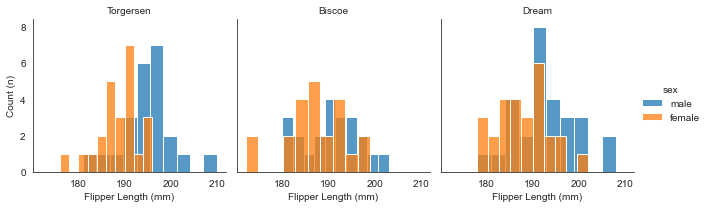

In [219]:
g = sns.FacetGrid(df[df['species']=='Adelie'],col='island',hue='sex')

g.map(sns.histplot, "flipper_length_mm",bins=10)
g.set_axis_labels('Flipper Length (mm)','Count (n)')
g.set_titles(col_template='{col_name}',row_template='{row_name}')
g.add_legend();

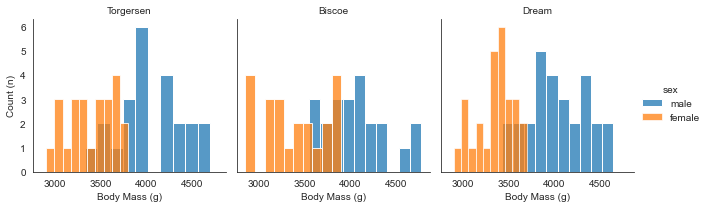

In [220]:
g = sns.FacetGrid(df[df['species']=='Adelie'],col='island',hue='sex')

g.map(sns.histplot, "body_mass_g",bins=10)
g.set_axis_labels('Body Mass (g)','Count (n)')
g.set_titles(col_template='{col_name}',row_template='{row_name}')
g.add_legend();

It seems the distribution of body dimensions are virtually the same on all islands.

___

## Machine Learning

We will be using Random Forest Classifier for this project. Random Forest is a tree-based model and hence does not require feature scaling.

Tree-based models do not care about the absolute value that a feature takes. They only care about the order of the values. 

In [127]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male


### Dummy variables and splitting the data

In [129]:
X = pd.get_dummies(df.drop('species',axis=1),drop_first=True)
y = df['species']

In [132]:
from sklearn.model_selection import train_test_split

In [133]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.1, random_state=101)

### Base model

In [138]:
from sklearn.ensemble import RandomForestClassifier

In [139]:
rfc = RandomForestClassifier()

In [142]:
print('Parameters currently in use:\n')
print(rfc.get_params())

Parameters currently in use:

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


### Hyperparameter tunning

In [134]:
from sklearn.model_selection import GridSearchCV

 Main parameters of a Random Forest Classifier:
 - n_estimators = number of trees in the foreset
 - max_features = max number of features considered for splitting a node
 
 For more detail have a look at <a href="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html">scikit-learn</a> documentation.
 
 

In [146]:
param_grid = {'n_estimators':[64,100,128,200],
              'max_features':[2,3,4]}

In [189]:
rfc_grid = GridSearchCV(rfc,
                       param_grid,
                       scoring='accuracy')

In [190]:
rfc_grid.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_features': [2, 3, 4],
                         'n_estimators': [64, 100, 128, 200]},
             scoring='accuracy')

In [191]:
rfc_grid.best_params_

{'max_features': 2, 'n_estimators': 64}

In [192]:
cv_results = pd.DataFrame(rfc_grid.cv_results_)

In [193]:
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.091949,0.011598,0.009644,0.002635,2,64,"{'max_features': 2, 'n_estimators': 64}",1.0,1.000000,1.0,1.0,0.983333,0.996667,0.006667,1
1,0.144706,0.030307,0.012797,0.002601,2,100,"{'max_features': 2, 'n_estimators': 100}",1.0,1.000000,1.0,1.0,0.983333,0.996667,0.006667,1
2,0.200907,0.046689,0.017033,0.003738,2,128,"{'max_features': 2, 'n_estimators': 128}",1.0,0.983333,1.0,1.0,0.983333,0.993333,0.008165,4
3,0.246051,0.005350,0.020662,0.000264,2,200,"{'max_features': 2, 'n_estimators': 200}",1.0,1.000000,1.0,1.0,0.983333,0.996667,0.006667,1
4,0.083957,0.007176,0.008247,0.000110,3,64,"{'max_features': 3, 'n_estimators': 64}",1.0,0.966667,1.0,1.0,0.983333,0.990000,0.013333,8


In [194]:
cv_results['mean_test_score'].mean()

0.9919444444444445

In [195]:
pd.DataFrame(data=rfc_grid.best_estimator_.feature_importances_,
             index=X.columns,columns=['feat_importance'])

,feat_importance
bill_length_mm,0.379751
bill_depth_mm,0.172541
flipper_length_mm,0.204001
body_mass_g,0.112168
island_Dream,0.109729
island_Torgersen,0.015987
sex_male,0.005823


GridSearchCV looked into 2 parameters only, max_features and n_estimators. With the default cv=5 the average accuracy was 0.99 and the best model parameters is max_features = 64 and n_estimators = 2

### Final Model Evaluation

In [196]:
rfc_grid.best_params_

{'max_features': 2, 'n_estimators': 64}

In [197]:
y_pred = rfc_grid.predict(X_test)

In [198]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix,accuracy_score

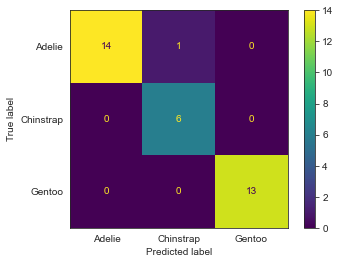

In [199]:
plot_confusion_matrix(rfc_grid,X_test,y_test)

In [200]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      Adelie       1.00      0.93      0.97        15
   Chinstrap       0.86      1.00      0.92         6
      Gentoo       1.00      1.00      1.00        13

    accuracy                           0.97        34
   macro avg       0.95      0.98      0.96        34
weighted avg       0.97      0.97      0.97        34



Ass we can see from the metrics above out ML model was able to classify correctly all Chinstrap and Gentoo penguins and mislabelled only 1 Adelie penguin. The overall accuracy of our final model on unseen data was 0.97.